In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [4]:
def func(x, x0, c0, c1, c2):
    ans = c1 * np.sin(c0 * x + x0) + c2
    for i in range (0, len(ans)):
        ans[i] = max (ans[i], 0)
    return ans
# -526.23441896 * sin(0.53359878 * (x / 365.0 * 12 + 1) + 7.06906783) + 374.69554147

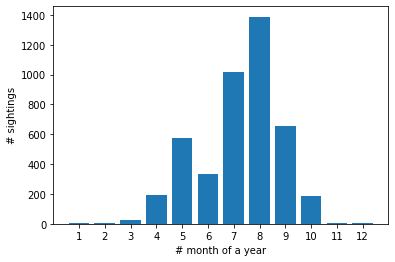

In [5]:
f = open("time4.txt", "r")
cnt = f.read().split('\n')[0:12]
for i in range(0, 12):
    cnt[i] = int(cnt[i])
# cnt = cnt / np.sum(cnt)

x = np.linspace(0, 11, 12)
dx = np.linspace(0, 12, 204)
ix = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.bar(ix, cnt)
plt.xlabel("# month of a year")
plt.ylabel("# sightings")
plt.xticks(ix, ix)
plt.savefig("month-sighting-bar.jpg", dpi = 500)

In [6]:
popt, pcov = curve_fit(func, ix, cnt, bounds = ((0, np.pi / 6 - 0.01, -10000, -10000), (12, np.pi / 6 + 0.01, 10000, 10000)))
print(popt)
print(pcov)

[3.93157966e+00 5.33598776e-01 7.92406498e+02 2.18150653e+02]
[[ 3.83411240e+01 -5.16701878e+00  1.14015368e+04 -1.20151885e+04]
 [-5.16701878e+00  6.96792656e-01 -1.53627985e+03  1.61939041e+03]
 [ 1.14015368e+04 -1.53627985e+03  3.44088772e+06 -3.59847479e+06]
 [-1.20151885e+04  1.61939041e+03 -3.59847479e+06  3.78679715e+06]]


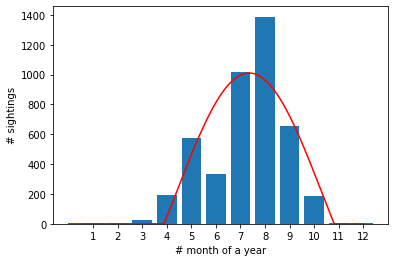

In [7]:
# for i in range (0, 100):
#     plt.scatter (i / 100.0, func(i, *popt))
#     print(dx[i], func(dx[i], *popt))
# print(func(dx, *popt))
plt.plot(dx, func(dx, *popt), 'r-')
plt.bar(ix, cnt)
plt.xlabel("# month of a year")
plt.ylabel("# sightings")
plt.xticks(ix, ix)
plt.savefig("month-sighting-bar.jpg", dpi = 500)
# plt.plot(ix, cnt)
plt.show()
# print(x)
# print(func(x, *popt))